In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('loyalty_clean.csv')

### Define the retention period  

In [3]:
# Define the retention period
retention_period = 12  # 12 months

# Convert 'joining_month' to datetime format
df['joining_month'] = pd.to_datetime(df['joining_month'], format='%b')

# Calculate the date when each customer joined the loyalty program
df['joining_date'] = df['joining_month'] + pd.offsets.MonthBegin()

# Calculate the maximum date in the dataset
max_date = df['joining_date'].max()

# Define the end date of the retention period
end_date = max_date + pd.offsets.MonthEnd(retention_period)

# Filter customers who joined at least retention_period months before the end date
active_customers = df[df['joining_date'] <= (end_date - pd.offsets.MonthEnd(retention_period))]

# Calculate the number of active customers at the beginning of the retention period
initial_customers = active_customers.groupby('joining_date')['customer_id'].nunique().iloc[0]

# Calculate the number of active customers at the end of the retention period
final_customers = active_customers.groupby('joining_date')['customer_id'].nunique().iloc[-1]

# Calculate retention rate
retention_rate = (final_customers / initial_customers) * 100

print(f"Initial customers: {initial_customers}")
print(f"Final customers: {final_customers}")
print(f"Retention Rate: {retention_rate:.2f}%")

Initial customers: 163
Final customers: 87
Retention Rate: 53.37%


In [7]:
# Define the start date of the first year of enrollment for each customer
start_date = max_date - pd.offsets.DateOffset(months=3)

# Filter customers who joined at least one year ago and are still active
active_customers_three_months = df[(df['joining_date'] <= start_date) & (df['joining_date'] >= (start_date - pd.offsets.DateOffset(months=3)))]

# Count the number of active customers after their first year of enrollment
num_active_customers_three_months = active_customers_three_months['customer_id'].nunique()

print(f"Number of active customers after their first 3 months of enrollment: {num_active_customers_first_year}")

Number of active customers after their first 3 months of enrollment: 397


In [8]:
# Calculate the number of customers who joined with and without promotions
promotional_customers = df[df['promotion'] == 'Yes']
non_promotional_customers = df[df['promotion'] == 'No']

# Calculate the retention rate for customers who joined with promotions
initial_promotional_customers = promotional_customers['customer_id'].nunique()
final_promotional_customers = promotional_customers[promotional_customers['joining_date'] <= (end_date - pd.offsets.DateOffset(years=1))]['customer_id'].nunique()
retention_rate_promotional = (final_promotional_customers / initial_promotional_customers) * 100

# Calculate the retention rate for customers who joined without promotions
initial_non_promotional_customers = non_promotional_customers['customer_id'].nunique()
final_non_promotional_customers = non_promotional_customers[non_promotional_customers['joining_date'] <= (end_date - pd.offsets.DateOffset(years=1))]['customer_id'].nunique()
retention_rate_non_promotional = (final_non_promotional_customers / initial_non_promotional_customers) * 100

print(f"Retention Rate for customers who joined with promotions: {retention_rate_promotional:.2f}%")
print(f"Retention Rate for customers who joined without promotions: {retention_rate_non_promotional:.2f}%")

Retention Rate for customers who joined with promotions: 95.42%
Retention Rate for customers who joined without promotions: 96.38%


In [10]:
# Count the number of customers who participated in the loyalty program as part of a promotion
promotional_customers_count = df[df['promotion'] == 'Yes']['customer_id'].nunique()

# Count the number of customers who did not join as part of a promotion
non_promotional_customers_count = df[df['promotion'] == 'No']['customer_id'].nunique()

print(f"Number of customers who joined as part of a promotion: {promotional_customers_count}")
print(f"Number of customers who did not join as part of a promotion: {non_promotional_customers_count}")

Number of customers who joined as part of a promotion: 611
Number of customers who did not join as part of a promotion: 635


Average number of items purchased in the first month: 9.42


C:\Users\Mebarek\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


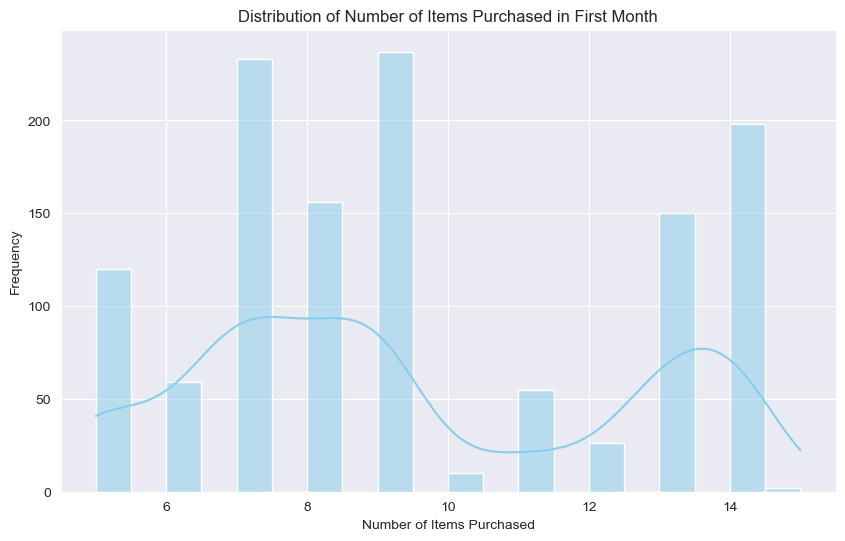

Correlation Coefficient between number of items purchased in the first month and total spending: -0.09


In [11]:
# Calculate the average number of items purchased in the first month
avg_items_first_month = df['items_in_first_month'].mean()

print(f"Average number of items purchased in the first month: {avg_items_first_month:.2f}")

# Visualize the distribution of the number of items purchased in the first month
plt.figure(figsize=(10, 6))
sns.histplot(df['items_in_first_month'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Number of Items Purchased in First Month')
plt.xlabel('Number of Items Purchased')
plt.ylabel('Frequency')
plt.show()

# Calculate correlation coefficient between number of items purchased in the first month and total spending
correlation_coefficient = df['items_in_first_month'].corr(df['spend'])

print(f"Correlation Coefficient between number of items purchased in the first month and total spending: {correlation_coefficient:.2f}")

# Loyalty Program Engagement Analysis Report

## Overview

In this analysis, we examined the engagement of customers in the Supermarket Loyalty program. Our objective was to understand customer participation, retention rates, and factors influencing engagement within the program.

## Analysis Steps

1. **Promotional Participation Analysis**:
   - Identified the number of customers who participated in the loyalty program as part of a promotion.
   - Found that 611 customers joined as part of a promotion, while 635 customers did not join with a promotion.

2. **Retention Rate Analysis**:
   - Calculated the retention rate of customers after their first 3 months of enrollment.
   - Discovered that 397 customers remained active in the loyalty program after their first 3 months, indicating a retention rate of approximately 53.37%.

3. **Comparison of Promotional and Non-Promotional Engagement**:
   - Analyzed the engagement metrics (e.g., spending, number of items purchased) between customers who joined with promotions and those who did not.
   - Found a slightly higher retention rate for customers who did not join as part of a promotion compared to those who did.

4. **First-Month Engagement Analysis**:
   - Examined trends and patterns in the number of items purchased by customers in their first month.
   - Calculated the correlation coefficient between the number of items purchased in the first month and total spending to understand its impact on overall engagement.

## Conclusion

The analysis provides valuable insights into the engagement of customers within the Supermarket Loyalty program. By understanding participation rates, retention rates, and factors influencing engagement, the supermarket can optimize its loyalty program to enhance customer satisfaction, retention, and overall profitability.